# Group delay

Install dependencies

In [1]:
!pip install numpy matplotlib

Import dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import firwin, cheby2, bessel, freqz, group_delay

Define sampling and cutoff frequencies

In [3]:
fs = 1000
fcutoff = fs / 4

print(f"Cutoff frequency = {fcutoff}Hz")

Cutoff frequency = 250.0Hz


FIR filtering

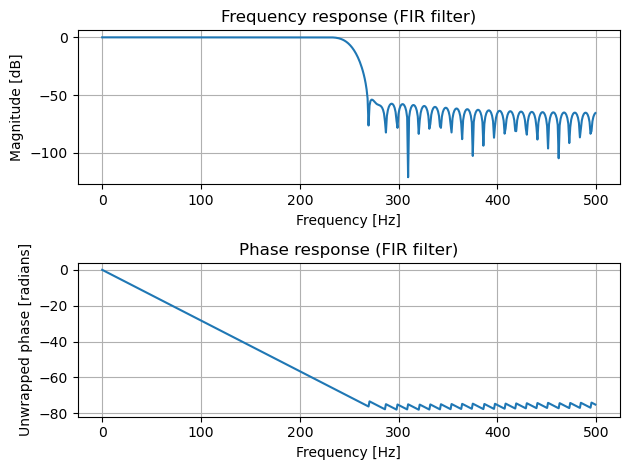

In [11]:
numtaps = 91
b = firwin(numtaps, fcutoff, fs = fs) 
w, h = freqz(b)
freqs = 0.5 * w * fs / np.pi
plt.figure()
plt.subplot(2, 1, 1)
plt.grid()
plt.plot(freqs, 20 * np.log10(np.abs(h)))
plt.title("Frequency response (FIR filter)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.subplot(2, 1, 2)
plt.grid()
plt.plot(freqs, np.unwrap(np.angle(h)))
plt.title("Phase response (FIR filter)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Unwrapped phase [radians]")
plt.tight_layout()
plt.show()

Group delay of FIR filter

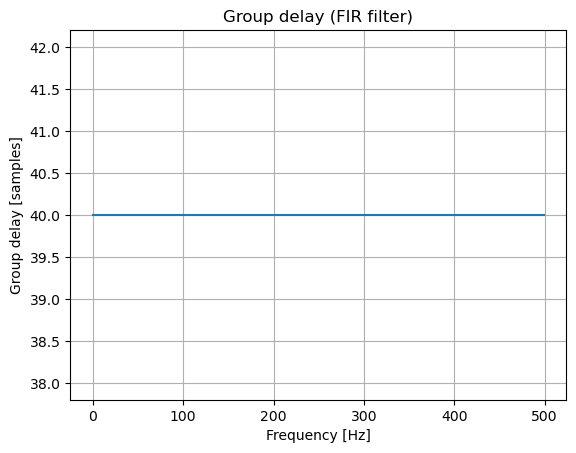

In [5]:
_, gd = group_delay((b, 1))
gd = np.round(gd)
plt.figure()
plt.grid()
plt.plot(freqs, gd) 
plt.title("Group delay (FIR filter)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Group delay [samples]")
plt.show()

IIR filtering (Chebyshev type II filter)

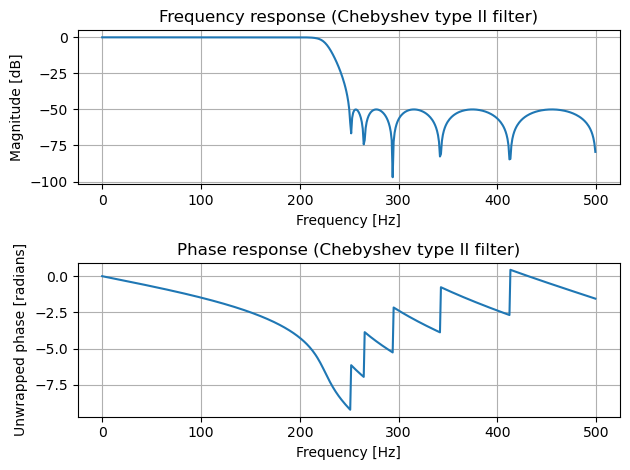

In [6]:
order = 11
rs = 50
b, a = cheby2(order, rs, fcutoff, fs = fs)
_, h = freqz(b, a)
plt.figure()
plt.subplot(2, 1, 1)
plt.grid()
plt.plot(freqs, 20 * np.log10(np.abs(h)))
plt.title("Frequency response (Chebyshev type II filter)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.subplot(2, 1, 2)
plt.grid()
plt.plot(freqs, np.unwrap(np.angle(h)))
plt.title("Phase response (Chebyshev type II filter)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Unwrapped phase [radians]")
plt.tight_layout()
plt.show()

Group delay of Chebyshev type II filter

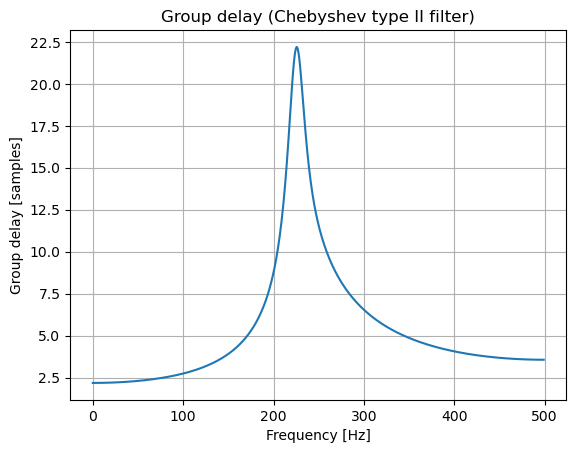

In [7]:
_, gd = group_delay((b, a))
plt.figure()
plt.grid()
plt.plot(freqs, gd)
plt.title("Group delay (Chebyshev type II filter)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Group delay [samples]")
plt.show()

IIR filtering (Bessel filter)

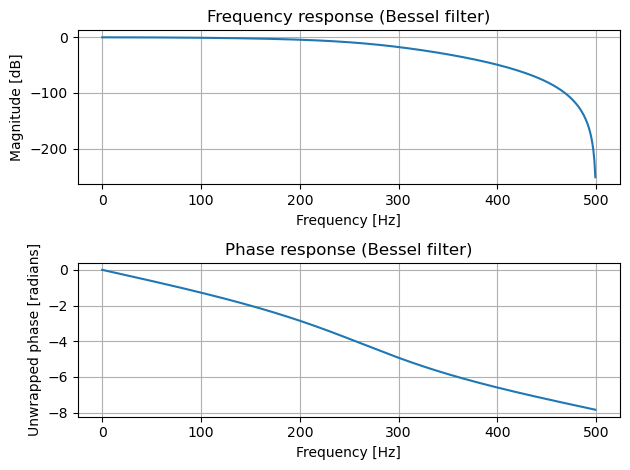

In [8]:
order = 5
b, a = bessel(order, fcutoff, fs = fs)
_, h = freqz(b, a)
plt.figure()
plt.subplot(2, 1, 1)
plt.grid()
plt.plot(freqs, 20 * np.log10(np.abs(h)))
plt.title("Frequency response (Bessel filter)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.subplot(2, 1, 2)
plt.grid()
plt.plot(freqs, np.unwrap(np.angle(h)))
plt.title("Phase response (Bessel filter)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Unwrapped phase [radians]")
plt.tight_layout()
plt.show()

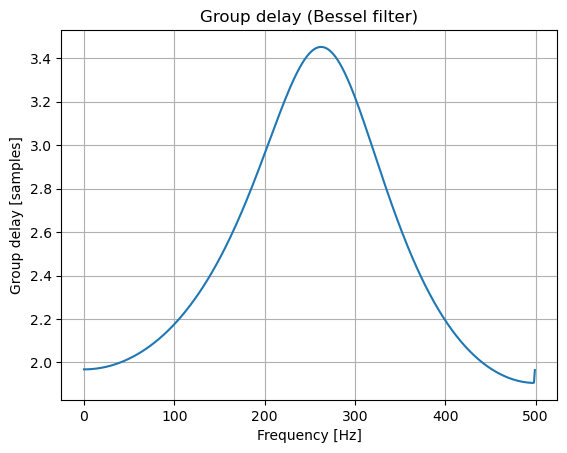

In [9]:
_, gd = group_delay((b, a))
plt.figure()
plt.grid()
plt.plot(freqs, gd)
plt.title("Group delay (Bessel filter)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Group delay [samples]")
plt.show()

All copyright reserved @2025 Ericsson